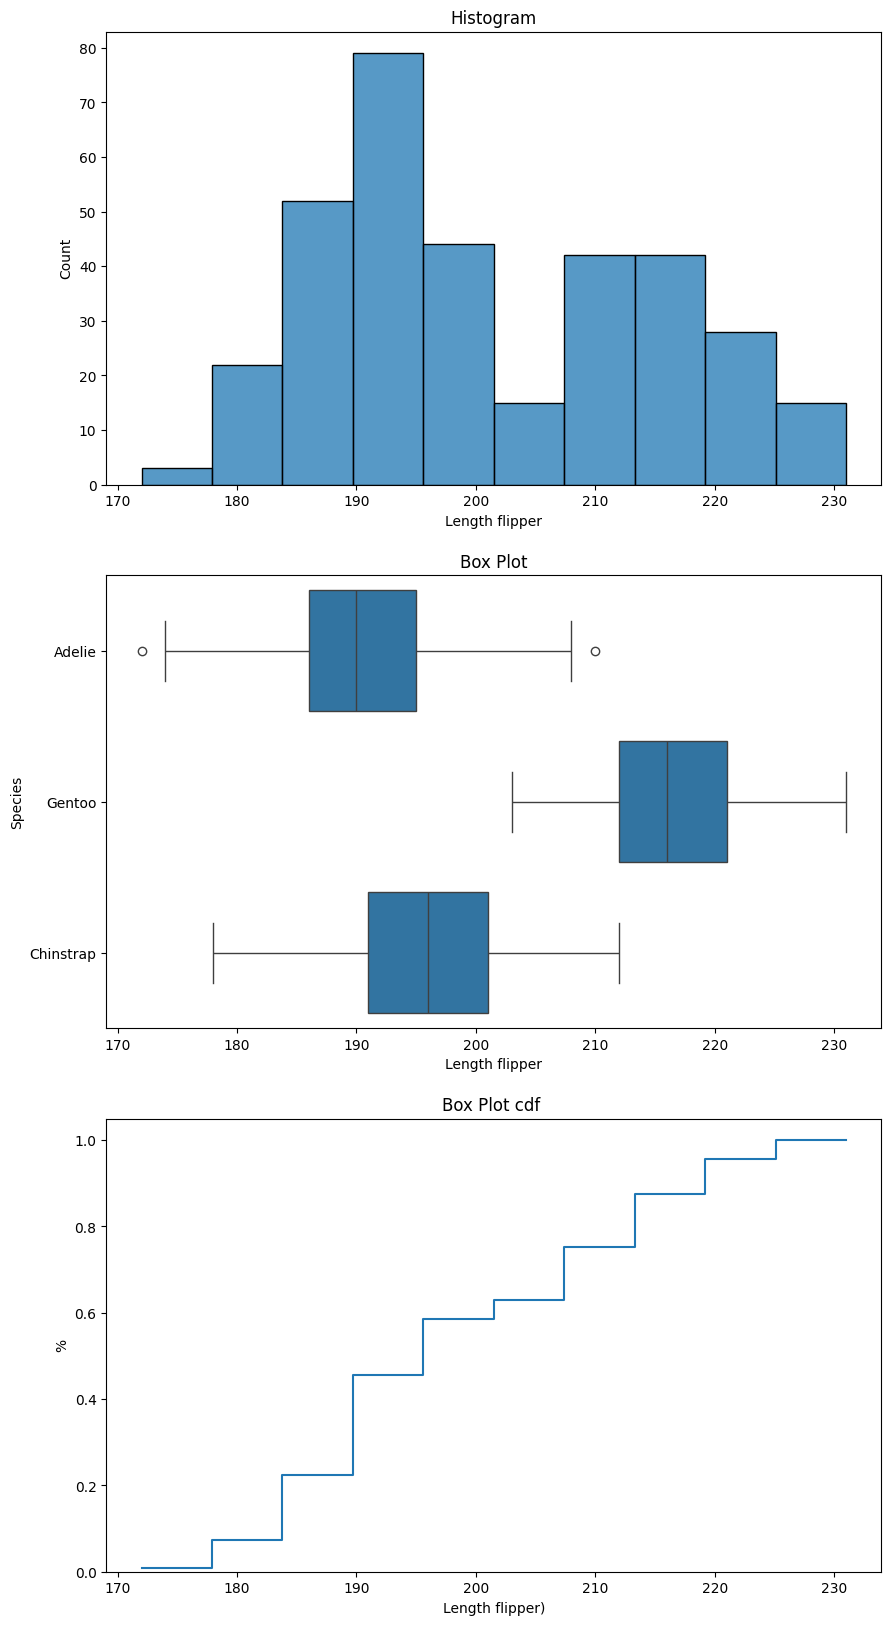

In [8]:

import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns


input_file = "penguins.csv"
missing_file = "missing.csv"
M = "NA"

df = pl.read_csv(input_file, null_values=[M])
fig, axes = plt.subplots(3, 1, figsize=(10, 20))  


sns.histplot(ax=axes[0], data=df, x="flipper_length_mm")
axes[0].set_title('Histogram')
axes[0].set_xlabel('Length flipper')
axes[0].set_ylabel('Count')


sns.boxplot(ax=axes[1], x="flipper_length_mm", y="species", data=df)
axes[1].set_title('Box Plot')
axes[1].set_xlabel('Length flipper')
axes[1].set_ylabel('Species')

sns.histplot(
data=df, x="flipper_length_mm", 
element="step", 
fill=False,
cumulative=True, 
stat="density", 

)
axes[2].set_title('Box Plot cdf ')
axes[2].set_xlabel('Length flipper)')
axes[2].set_ylabel('%')


df_with_missing = df.filter(pl.any_horizontal(pl.all().is_null()))
df_with_missing.write_csv(missing_file)

